In [4]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import kagglehub
from sklearn.model_selection import train_test_split
import requests
import os
import concurrent.futures

Creating the directories that will receive the images

In [2]:
def check_directories():
    if not os.path.exists('images'):
       os.makedirs('images')

    if not os.path.exists('images/dogs'):
       os.makedirs('images/dogs')

    if not os.path.exists('images/ducks'):
       os.makedirs('images/ducks')

    if not os.path.exists('images/foxes'):
       os.makedirs('images/foxes')

check_directories()  

In [3]:
def get_images(api_url):
    r = requests.get(api_url)
    data = r.json()

    if(api_url == 'https://randomfox.ca/floof/'):
        second_key = list(data.keys())[0]
    else:
        second_key = list(data.keys())[1]
    
    return data[second_key]



In [4]:

def download_images(i,animal):

    try:
        while True:
            if(animal == 'dog'):
                url = get_images('https://random.dog/woof.json')
            elif(animal == 'foxe'):
                url = get_images('https://randomfox.ca/floof/')
            elif(animal == 'duck'):
                url = get_images('https://random-d.uk/api/random?type=jpg')
            
         
            img_data = requests.get(url)
           
            if url.endswith(('.mp4', '.webm', 'gif')):
                print(f"[{i}] Video/Gif detected , trying again...")
                continue 

            file_path = f'images/{animal}s/{animal}_{i}.jpg'

            with open(file_path, 'wb') as f:
                f.write(img_data.content)

            print(f"Successfully downloaded: {file_path}")
            break
    except Exception as e:
        print(f"error: {e}")
        raise


total_images = 1000

check_directories()

animals = ['foxe','duck','dog']



with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    for animal in animals:
        futures = [executor.submit(download_images, i, animal) for i in range(1, total_images + 1)]
        concurrent.futures.wait(futures)



Successfully downloaded: images/foxes/foxe_76.jpg
Successfully downloaded: images/foxes/foxe_47.jpg
Successfully downloaded: images/foxes/foxe_7.jpg
Successfully downloaded: images/foxes/foxe_55.jpg
Successfully downloaded: images/foxes/foxe_75.jpg
Successfully downloaded: images/foxes/foxe_90.jpg
Successfully downloaded: images/foxes/foxe_99.jpg
Successfully downloaded: images/foxes/foxe_37.jpg
Successfully downloaded: images/foxes/foxe_88.jpg
Successfully downloaded: images/foxes/foxe_43.jpg
Successfully downloaded: images/foxes/foxe_46.jpg
Successfully downloaded: images/foxes/foxe_36.jpg
Successfully downloaded: images/foxes/foxe_52.jpg
Successfully downloaded: images/foxes/foxe_87.jpg
Successfully downloaded: images/foxes/foxe_32.jpg
Successfully downloaded: images/foxes/foxe_74.jpg
Successfully downloaded: images/foxes/foxe_69.jpg
Successfully downloaded: images/foxes/foxe_48.jpg
Successfully downloaded: images/foxes/foxe_82.jpg
Successfully downloaded: images/foxes/foxe_27.jpg
S

In [1]:
from PIL import Image
import numpy as np


animals = ['foxe','duck','dog']

x_dict = {
    'foxe': [],
    'duck': [],
    'dog': []
}

y_dict = {
    'foxe': [],
    'duck': [],
    'dog': []
}



In [27]:
x_dict['foxe'] = []
x_dict['duck'] = []
x_dict['dog'] = []

y_dict['foxe'] = []
y_dict['duck'] = []
y_dict['dog'] = []


[]


In [28]:

for animal in animals:

  for i in range(1,1001):
    

      file_path = f'images/{animal}s/{animal}_{i}.jpg'      
      image = Image.open(file_path).convert('RGB')
      image = image.resize((64,64))
      image_array = np.array(image)
      x_dict[animal].append(image_array)
      y_dict[animal].append(f'{animal}')



In [30]:

X = x_dict['foxe'] + x_dict['duck'] + x_dict['dog']
y = y_dict['foxe'] + y_dict['duck'] + y_dict['dog']



foxe
64
64
64
64
X length is  3000
y length is  3000


In [31]:
result = 0

for images in X:
    if images.shape != (64,64,3):
        images = images[:,:,3]
        result += 1



O resultado é 0


In [38]:
from sklearn.linear_model import LogisticRegression

X = X.reshape((X.shape[0], -1))  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [41]:
y_pred = logreg.predict(X_test)


['duck' 'duck' 'duck' 'foxe' 'dog' 'duck' 'duck' 'dog' 'foxe' 'dog' 'dog'
 'foxe' 'foxe' 'duck' 'dog' 'foxe' 'duck' 'foxe' 'dog' 'dog' 'foxe' 'foxe'
 'foxe' 'dog' 'duck' 'duck' 'dog' 'duck' 'foxe' 'duck' 'dog' 'foxe' 'foxe'
 'dog' 'foxe' 'foxe' 'dog' 'foxe' 'foxe' 'duck' 'foxe' 'foxe' 'foxe'
 'foxe' 'duck' 'duck' 'dog' 'foxe' 'foxe' 'duck' 'duck' 'dog' 'foxe' 'dog'
 'foxe' 'dog' 'duck' 'foxe' 'dog' 'duck' 'foxe' 'foxe' 'foxe' 'foxe'
 'foxe' 'duck' 'dog' 'duck' 'dog' 'foxe' 'duck' 'dog' 'dog' 'duck' 'foxe'
 'foxe' 'dog' 'dog' 'dog' 'dog' 'duck' 'duck' 'foxe' 'duck' 'dog' 'foxe'
 'dog' 'duck' 'dog' 'dog' 'foxe' 'duck' 'dog' 'dog' 'duck' 'foxe' 'dog'
 'dog' 'foxe' 'duck' 'dog' 'foxe' 'foxe' 'duck' 'duck' 'foxe' 'duck'
 'foxe' 'foxe' 'duck' 'dog' 'foxe' 'duck' 'dog' 'foxe' 'dog' 'foxe' 'foxe'
 'dog' 'duck' 'dog' 'duck' 'foxe' 'duck' 'duck' 'dog' 'duck' 'foxe' 'foxe'
 'foxe' 'duck' 'dog' 'duck' 'duck' 'foxe' 'foxe' 'foxe' 'duck' 'duck'
 'dog' 'dog' 'duck' 'dog' 'dog' 'dog' 'foxe' 'dog' 'duc

In [42]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy in test set: {accuracy:.2f}')

Accuracy in test set: 0.89


In [43]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         dog       0.86      0.83      0.84       186
        duck       0.85      0.84      0.85       197
        foxe       0.95      1.00      0.98       217

    accuracy                           0.89       600
   macro avg       0.89      0.89      0.89       600
weighted avg       0.89      0.89      0.89       600



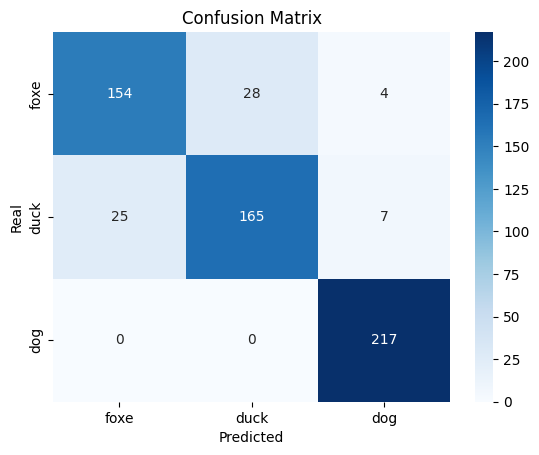

In [51]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=animals, yticklabels=animals)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()
